In [6]:
# For an explanation of the algorithm see:
# https://generativeartistry.com/tutorials/piet-mondrian/

import os

WIDTH = 600
HEIGHT = 600

colors = ['#D40920', '#1356A2', '#F7D842']
STROKE_WEIGHT = 8

STEP = 6
STEP_WIDTH = WIDTH / STEP
STEP_HEIGHT = HEIGHT / STEP

class Cell:
    def __init__(self, x, y, width_cell, height_cell):
        self.x = x
        self.y = y
        self.width_cell = width_cell
        self.height_cell = height_cell
        
    def __repr__(self):
        return f'(({self.x},{self.y}), ({self.width_cell},{self.height_cell})'
    
    def split_on_x(self, split_at):
        if self.x < split_at < (self.x + self.width_cell):
            # coin flip to know if we split the cell or do nothing
            coin = random_int()
            if coin:
                return Cell(self.x, self.y, (split_at - self.x), self.height_cell), Cell(split_at, self.y, self.width_cell - (split_at - self.x), self.height_cell)
        return [self]
        
    def split_on_y(self, split_at):
        if self.y < split_at < (self.y + self.height_cell):
            # coin flip to know if we split the cell or do nothing
            coin = random_int()
            if coin:
                return Cell(self.x, self.y, self.width_cell, (split_at - self.y)), Cell(self.x, split_at, self.width_cell, self.height_cell - (split_at - self.y),)
        return [self]
        
def setup():
    size(WIDTH, HEIGHT)
    background(255)
    stroke(0)
    stroke_weight(STROKE_WEIGHT)
    
    global list_cells
    list_cells = [Cell(0, 0, width, height)]
    
    for i in range(1, STEP):
        split_at_x = STEP_WIDTH * i
        split_at_y = STEP_HEIGHT * i
        
        # Split on x
        for _ in range(len(list_cells)):
            list_cells += list_cells.pop(0).split_on_x(split_at_x)
        # Split on y
        for _ in range(len(list_cells)):
            list_cells += list_cells.pop(0).split_on_y(split_at_y)
        
    print(f'{len(list_cells)=}, {list_cells}')
    
    no_fill()
    no_loop()
    
def draw():
    # Draw the cells as white
    for c in list_cells:
        rect(c.x, c.y, c.width_cell, c.height_cell)
        
    # Pick 3 random cells to be colorized 
    list_cells_colorized = random_sample(list_cells, size = 3, replace = False)
    for c, col in zip(list_cells_colorized, colors):
        fill(col)
        rect(c.x, c.y, c.width_cell, c.height_cell)
        
    save_frame(os.getcwd() + "/mondrian_####.png", use_thread=True)

run_sketch()

len(list_cells)=20, [((0,0), (100.0,100.0), ((0,100.0), (100.0,100.0), ((0,200.0), (100.0,100.0), ((0,300.0), (100.0,200.0), ((0,500.0), (100.0,100.0), ((100.0,0), (100.0,100.0), ((200.0,0), (100.0,100.0), ((300.0,0), (300.0,100.0), ((100.0,100.0), (100.0,300.0), ((100.0,400.0), (100.0,200.0), ((200.0,100.0), (100.0,100.0), ((300.0,100.0), (100.0,100.0), ((400.0,100.0), (100.0,100.0), ((500.0,100.0), (100.0,100.0), ((200.0,200.0), (100.0,300.0), ((200.0,500.0), (100.0,100.0), ((300.0,200.0), (100.0,100.0), ((400.0,200.0), (200.0,100.0), ((300.0,300.0), (300.0,200.0), ((300.0,500.0), (300.0,100.0)]


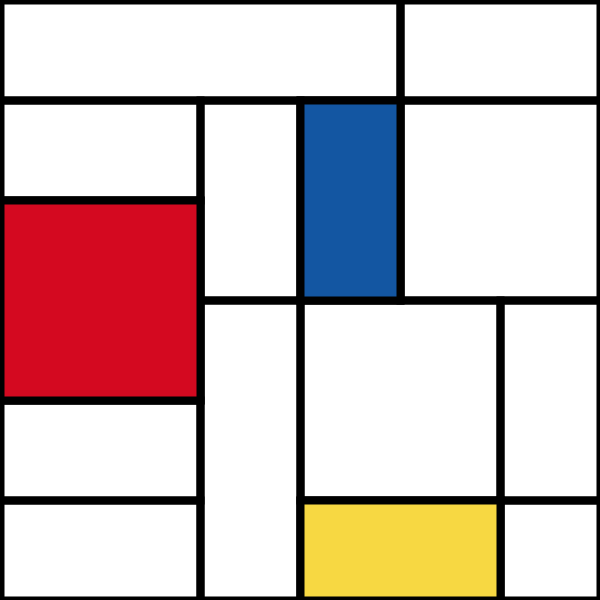